<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##*Lab 4*: CART

###**Tenggat Waktu: 8 Oktober 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab4_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **8 Oktober 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Jeremy Mervin"
KELAS = "E"
NPM = "2106654675"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Jeremy Mervin dari kelas E dengan NPM 2106654675, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Jeremy Mervin)


## Deskripsi Dataset

Lab ini akan menggunakan 2 dataset, yakni dataset untuk klasifikasi dan dataset untuk regresi.

Dataset yang digunakan untuk klasifikasi adalah dataset **Red Wine Quality** (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) dengan modifikasi.

Dataset yang akan digunakan untuk regresi adalah dataset **Graduate Admission 2** (https://www.kaggle.com/datasets/mohansacharya/graduate-admissions) dengan modifikasi.

### Deskripsi Dataset Klasifikasi

Dataset ini berisi informasi mengenai atribut-atribut yang dirasa berpengaruh terhadap kualitas dari suatu Red Wine yang diukur dengan angka 0 sampai dengan 10 (Quality).

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:


*   **Fixed Acidity**: Sebagian besar asam yang terlibat dalam anggur adalah asam tetap atau tidak mudah menguap (tidak menguap dengan mudah).
*   **Volatile Acidity**: Jumlah asam asetat dalam anggur, yang pada kadar yang terlalu tinggi dapat menyebabkan rasa cuka yang tidak enak.
*   **Citric Acid**: Ditemukan dalam jumlah kecil, asam sitrat dapat menambahkan 'kesegaran' dan rasa pada anggur.
*   **Residual Sugar**: Jumlah gula yang tersisa setelah fermentasi berhenti.
*   **Chlorides**: Jumlah kadar garam pada wine.
*   **Free Sulfur Dioxide**: Bentuk bebas SO2 ada dalam keseimbangan antara SO2 molekuler (sebagai gas terlarut) dan ion bisulfit.
*   **Total Sulfur Dioxide**: Jumlah bentuk bebas dan terikat dari SO2.
*   **Density**: Kepadatan air tergantung pada persentase alkohol dan kandungan gula.
*   **pH**: Menggambarkan seberapa asam atau basa suatu anggur pada skala dari 0 (sangat asam) hingga 14 (sangat basa).
*   **Sulphates**: Sebuah tambahan untuk anggur yang dapat berkontribusi pada tingkat gas sulfur dioksida (SO2).
*   **Alcohol**: Persentase kandungan alkohol dalam anggur.
*   **Quality**: Variabel keluaran (berdasarkan data sensori, skor antara 0 dan 10).









### Deskripsi Dataset Regresi

Dataset ini berisi informasi mengenai atribut-atribut yang dirasa berpengaruh terhadap besarnya peluang (Chance of Admit) dari seorang pelamar untuk diterima pada program Magister-nya di daerah India.

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:



*   **GRE Scores (out of 340)**: Skor yang diperoleh oleh calon pelamar pada tes GRE.
*   **TOEFL Scores (out of 120)**: Skor yang diperoleh oleh calon pelamar pada tes TOEFL.
*   **University Rating (out of 5)**: Rating universitas yang didaftar oleh calon pelamar.
*  **Statement of Purpose and Letter of Recommendation Strength (out of 5)**: Skor yang diperoleh dari surat rekomendasi yang dilampirkan oleh calon pelamar.
*   **Undergraduate GPA (out of 10)**: GPA yang diperoleh oleh calon pelamar pada saat masa *undergraduate*.
*   **Research Experience (either 0 or 1)**: Ada/tidaknya pengalaman meneliti yang dimiliki oleh calon pelamar. 0 berarti tidak, 1 berarti iya.
*   **Chance of Admit (ranging from 0 to 1)**: Peluang diterimanya calon pelamar pada suatu universitas dengan skor-skor yang dimilikinya.

## Import Libraries

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz

## Read Datasets

**Bacalah konten dari masing-masing dataset yang telah disediakan. Perhatikan tipe data dari masing-masing kolom, apakah sudah cocok untuk dijadikan input ke dalam model atau tidak.**

### Dataset Red Wine

**Terapkan proses Read Dataset di bawah cell ini**

In [27]:
df_wine = pd.read_csv('Red_Wine_Quality_Train.csv')

### Dataset Admission Prediction

**Terapkan proses Read Dataset di bawah cell ini**

In [28]:
df_admission = pd.read_csv('Admission_Prediction_Train.csv')

## SOAL 1 Data Pre-processing [20]

**Terapkanlah proses data pre-processing pada bagian ini agar dataset yang telah diberikan dapat dijadikan input dari model yang akan kalian buat. Terapkan proses tersebut untuk masing-masing dataset (Red Wine & Admission Prediction) hingga dataset terbagi menjadi train dan test**

### Dataset Red Wine

**Terapkan proses data pre-processing di bawah cell ini**

In [29]:
# Melihat shape dari dataframe
total_rows, total_attributes = df_wine.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

# Melihat 5 elemen pertama dari dataset
df_wine.head()

Jumlah data: 3466
Jumlah atribut: 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,12.200000,0.450000,0.490000,1.400000,0.075000,3.000000,6.000000,0.996900,3.130000,0.630000,10.400000,5
1,7.100000,0.430000,0.170000,1.800000,0.082000,27.000000,51.000000,0.996340,3.490000,0.640000,10.400000,5
2,7.784053,0.280000,0.303572,1.993696,0.061832,17.978987,33.957974,0.995235,3.277268,0.895167,11.285291,7
3,7.960832,0.762917,0.015375,2.490418,0.085412,13.341669,26.512503,0.997363,3.376833,0.470250,9.856252,4
4,7.700000,0.705000,0.100000,2.600000,0.084000,9.000000,26.000000,0.997600,3.390000,0.490000,9.700000,5


In [14]:
# Melihat kolom-kolom pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3466 non-null   float64
 1   volatile acidity      3466 non-null   float64
 2   citric acid           3466 non-null   float64
 3   residual sugar        3466 non-null   float64
 4   chlorides             3466 non-null   float64
 5   free sulfur dioxide   3466 non-null   float64
 6   total sulfur dioxide  3466 non-null   float64
 7   density               3466 non-null   float64
 8   pH                    3466 non-null   float64
 9   sulphates             3466 non-null   float64
 10  alcohol               3466 non-null   float64
 11  quality               3466 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 325.1 KB


In [30]:
# Membaca duplikasi data

duplicates_wine = df_wine[df_wine.duplicated()]

rows = duplicates_wine.count()[0]

print("jumlah duplikasi baris: ")
rows

jumlah duplikasi baris: 


242

In [31]:
#Menangani duplikasi data

drop_duplicates_wine = df_wine.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

drop_duplicates_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,12.200000,0.450000,0.490000,1.400000,0.075000,3.000000,6.000000,0.996900,3.130000,0.630000,10.400000,5
1,7.100000,0.430000,0.170000,1.800000,0.082000,27.000000,51.000000,0.996340,3.490000,0.640000,10.400000,5
2,7.784053,0.280000,0.303572,1.993696,0.061832,17.978987,33.957974,0.995235,3.277268,0.895167,11.285291,7
3,7.960832,0.762917,0.015375,2.490418,0.085412,13.341669,26.512503,0.997363,3.376833,0.470250,9.856252,4
4,7.700000,0.705000,0.100000,2.600000,0.084000,9.000000,26.000000,0.997600,3.390000,0.490000,9.700000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3459,7.739080,0.747077,0.029631,2.759688,0.082086,13.658457,26.987685,0.996957,3.383169,0.479754,10.093843,4
3460,6.794068,0.811737,0.001186,1.235593,0.255788,15.406785,27.991534,0.994787,3.333644,0.517119,9.808898,3
3461,8.285252,1.017603,0.020000,3.385252,0.083945,6.000000,11.009217,0.998893,3.480645,0.491290,10.990322,3
3463,7.873784,0.350633,0.458011,3.585536,0.077837,15.036160,37.117519,0.997249,3.353345,0.858915,12.810848,8


### Dataset Admission Prediction

**Terapkan proses data pre-processing di bawah cell ini**

In [33]:
# Melihat shape dari dataframe
total_rows, total_attributes = df_admission.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

# Melihat 5 elemen pertama dari dataset
df_admission.head()

Jumlah data: 350
Jumlah atribut: 10


,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,5,6,330,115,5,4.5,3.0,9.34,1,0.90
1,116,117,299,102,3,4.0,3.5,8.62,0,0.56
2,45,46,322,110,5,5.0,4.0,9.10,1,0.88
3,16,17,317,107,3,4.0,3.0,8.70,0,0.66
4,462,463,307,105,4,3.0,3.0,7.94,0,0.62


In [34]:
df_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         350 non-null    int64  
 1   Serial No.         350 non-null    int64  
 2   GRE Score          350 non-null    int64  
 3   TOEFL Score        350 non-null    int64  
 4   University Rating  350 non-null    int64  
 5   SOP                350 non-null    float64
 6   LOR                350 non-null    float64
 7   CGPA               350 non-null    float64
 8   Research           350 non-null    int64  
 9   Chance of Admit    350 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 27.5 KB


In [35]:
# Membaca duplikasi data

duplicates_admission = df_admission[df_admission.duplicated()]

rows = duplicates_admission.count()[0]

print("jumlah duplikasi baris: ")
rows

jumlah duplikasi baris: 


0

In [36]:
#Menangani duplikasi data

drop_duplicates_admission = df_admission.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

drop_duplicates_admission

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,5,6,330,115,5,4.5,3.0,9.34,1,0.90
1,116,117,299,102,3,4.0,3.5,8.62,0,0.56
2,45,46,322,110,5,5.0,4.0,9.10,1,0.88
3,16,17,317,107,3,4.0,3.0,8.70,0,0.66
4,462,463,307,105,4,3.0,3.0,7.94,0,0.62
...,...,...,...,...,...,...,...,...,...,...
345,106,107,329,111,4,4.5,4.5,9.18,1,0.87
346,270,271,306,105,2,2.5,3.0,8.22,1,0.72
347,348,349,302,99,1,2.0,2.0,7.25,0,0.57
348,435,436,309,105,2,2.5,4.0,7.68,0,0.55


## CART (Classification and Regression Tree)

### Decision Tree

Decision Tree merupakan model yang beroperasi dengan struktur berbentuk Binary Tree, di mana setiap node hanya dapat memiliki dua child node paling banyak. Dalam bidang data science, model ini diterapkan dalam konteks Supervised Learning, yaitu model dibentuk berdasarkan data training dan selanjutnya digunakan untuk membuat prediksi terhadap data yang disajikan. Data training yang digunakan akan diolah menjadi sebuah rangkaian aturan dalam bentuk Binary Tree. Aturan-aturan ini selanjutnya digunakan untuk proses prediksi pada dataset lain.

#### Training

Function di bawah ini merupakan function yang dapat digunakan untuk menghitung metrics hasil testing, baik untuk kasus regresi, maupun kasus klasifikasi.

In [26]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [5]:
def classification_metrics(prediction, y_test):
  accuracy = accuracy_score(y_test, prediction)
  f1 = f1_score(y_test, prediction, average="macro")
  recall = recall_score(y_test, prediction, average="macro")
  precision = precision_score(y_test, prediction, average="macro")

  print('Accuracy: ' + str(accuracy))
  print('F1 Score: ' + str(f1))
  print('Recall Score: ' + str(recall))
  print('Precision Score: ' + str(precision))


##### Dataset Red Wine

In [37]:
# Memisahkan fitur target pada DF yang berbeda
X_data_wine = df_wine.drop('quality', axis=1)
Y_predict_wine = df_wine['quality']

In [41]:
# Membagi dataset menjadi 0.2 untuk testing, dan 0.8 untuk training
X_train_red, X_test_red, Y_train_red, Y_test_red = train_test_split(
    X_data_wine, Y_predict_wine, test_size=0.2, random_state=42)

In [40]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu
dtc_red = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc_red.fit(X_train_red, Y_train_red)

DecisionTreeClassifier(max_depth=3, random_state=42)

##### Dataset Admission Prediction

In [42]:
# Memisahkan fitur target pada DF yang berbeda
X_data_admission = df_admission.drop('Chance of Admit', axis=1)
Y_predict_admission = df_admission['Chance of Admit']

In [44]:
# Membagi dataset menjadi 0.2 untuk testing, dan 0.8 untuk training
X_train_admission, X_test_admission, Y_train_admission, Y_test_admission = train_test_split(
    X_data_admission, Y_predict_admission, test_size=0.2, random_state=42)

In [45]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu
dtr_admission = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr_admission.fit(X_train_admission, Y_train_admission)

DecisionTreeRegressor(max_depth=3, random_state=42)

#### Evaluation

##### Dataset Red Wine

In [50]:
# Memprediksi data testing
prediction = dtc_red.predict(X_test_red)

# Call the metrics function
classification_metrics(prediction, Y_test_red)

Accuracy: 0.46253602305475505
F1 Score: 0.41269303349802705
Recall Score: 0.46428947960153416
Precision Score: 0.43321055013773213


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Dataset Admission Prediction

In [51]:
# Memprediksi data testing
prediction = dtr_admission.predict(X_test_admission)

# Call the metrics function
regression_metrics(prediction, Y_test_admission)

MAE: 0.05986515898240106
MSE: 0.0058009215250149435
RMSE: 0.07616378092646756
R_squared: 0.6376365279751508


#### Hyperparameter


Hyperparameter adalah parameter yang dapat kita sesuaikan atau konfigurasi sebelum memulai proses pembangunan model. Tujuan dari penyesuaian ini adalah untuk mengoptimalisasi performa model sehingga diharapkan dapat berfungsi lebih efektif.

> Ada beberapa jenis hyperparameter yang terdapat dalam beragam algoritma machine learning, termasuk dalam algoritma Decision Tree. Beberapa hyperparameter yang ada dalam algoritma Decision Tree yang disediakan oleh modul sklearn.tree antara lain:

- `criterion`: Metrik yang digunakan untuk mengevaluasi kualitas pemisahan node, contohnya:
- `squared_error`: menggunakan reduksi varians sebagai kriteria seleksi fitur dan meminimalkan kerugian L2 dengan menggunakan mean dari setiap node terminal
- `friedman_mse`: menghitung mean squared error dengan Friedman's improvement score untuk kemungkinan pemisahan (tidak perlu khawatir, ini tidak akan keluar di ujian)
- `absolute_error`: meminimalkan kerugian L1 dengan menggunakan median dari setiap node terminal
- `poisson`: memanfaatkan reduksi dalam Poisson deviance untuk menentukan pemisahan
- `max_depth`: Membatasi kedalaman maksimum dari pohon
- `min_samples_split`: Menentukan jumlah minimum sampel yang dibutuhkan untuk memecah sebuah node internal
Untuk informasi lebih detail, Anda bisa merujuk pada dokumentasi berikut:
[sklearn decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [52]:
# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter max_depth=3
dtr_md6 = DecisionTreeRegressor(max_depth=6, random_state=42)
dtr_md6.fit(X_train_admission, Y_train_admission)

# Memprediksi data testing
predicted6 = dtr_md6.predict(X_test_admission)

# Menampilkan metrics evaluasi
regression_metrics(predicted6, Y_test_admission)

MAE: 0.06726742339785817
MSE: 0.00865787351889976
RMSE: 0.09304769486075279
R_squared: 0.45917263401482866


Perubahan *hyperparameter* dapat mempengaruhi performa dari model. Pada awalnya dengan `max_depth = 3` model menghasilkan *MAE* 0.04837917276086966 dan *RMSE* 0.06888923287937174. Setelah dilakukan perubahan *hyperparameter* dengan `max_depth = 6`, kita dapat melihat bahwa ada penurunan pada performa model dengan *MAE* 0.049144375215427846 dan *RMSE* 0.0704508435958617

Bagaimana jika hyperparameter lain diubah? Silakan eksplorasi perubahan hyperparameter lain secara mandiri ya!😃

### Visualisasi Decision Tree yang Dihasilkan



Kita bisa melakukan visualisasi terhadap serangkaian aturan yang membentuk Decision Tree yang telah dibangun. Salah satu caranya adalah dengan menggunakan modul `sklearn.tree.plot_tree` dengan bantuan `matplotlib`.

Berikut adalah contoh visualisasi decision tree pada dataset Admission Prediction tanpa max depth:

In [54]:
# Membangun model tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_admission, Y_train_admission)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(tree_model, feature_names=pd.Series(X_train_admission.columns).array))

|--- CGPA <= 8.93
|   |--- CGPA <= 8.03
|   |   |--- GRE Score <= 305.50
|   |   |   |--- CGPA <= 7.66
|   |   |   |   |--- GRE Score <= 301.00
|   |   |   |   |   |--- Serial No. <= 361.00
|   |   |   |   |   |   |--- GRE Score <= 298.50
|   |   |   |   |   |   |   |--- CGPA <= 7.64
|   |   |   |   |   |   |   |   |--- Unnamed: 0 <= 139.50
|   |   |   |   |   |   |   |   |   |--- Unnamed: 0 <= 27.50
|   |   |   |   |   |   |   |   |   |   |--- value: [0.44]
|   |   |   |   |   |   |   |   |   |--- Unnamed: 0 >  27.50
|   |   |   |   |   |   |   |   |   |   |--- SOP <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.46]
|   |   |   |   |   |   |   |   |   |   |--- SOP >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.47]
|   |   |   |   |   |   |   |   |--- Unnamed: 0 >  139.50
|   |   |   |   |   |   |   |   |   |--- Serial No. <= 217.50
|   |   |   |   |   |   |   |   |   |   |--- value: [0.53]
|   |   |   |   |   |   |   |   |   |--- Serial No. >  21

Dapat dilihat bahwa *decision tree* yang dihasilkan terlihat sangat kompleks. Hal tersebut beresiko untuk terjadi *overfitting* dan juga sulit untuk divisualisasikan. Oleh karena itu, akan perubahan *hyperparameter* pada model decision tree bisa membuat model yang dihasilkan tidak terlalu kompleks.

In [55]:
# Membangun model tree
dt_md4 = DecisionTreeRegressor(max_depth=4)
dt_md4.fit(X_train_admission, Y_train_admission)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(dt_md4, feature_names=pd.Series(X_train_admission.columns).array))

|--- CGPA <= 8.93
|   |--- CGPA <= 8.03
|   |   |--- GRE Score <= 305.50
|   |   |   |--- CGPA <= 7.66
|   |   |   |   |--- value: [0.46]
|   |   |   |--- CGPA >  7.66
|   |   |   |   |--- value: [0.55]
|   |   |--- GRE Score >  305.50
|   |   |   |--- GRE Score <= 319.50
|   |   |   |   |--- value: [0.60]
|   |   |   |--- GRE Score >  319.50
|   |   |   |   |--- value: [0.74]
|   |--- CGPA >  8.03
|   |   |--- CGPA <= 8.34
|   |   |   |--- Research <= 0.50
|   |   |   |   |--- value: [0.63]
|   |   |   |--- Research >  0.50
|   |   |   |   |--- value: [0.69]
|   |   |--- CGPA >  8.34
|   |   |   |--- Unnamed: 0 <= 126.00
|   |   |   |   |--- value: [0.68]
|   |   |   |--- Unnamed: 0 >  126.00
|   |   |   |   |--- value: [0.74]
|--- CGPA >  8.93
|   |--- CGPA <= 9.18
|   |   |--- CGPA <= 9.05
|   |   |   |--- GRE Score <= 311.00
|   |   |   |   |--- value: [0.66]
|   |   |   |--- GRE Score >  311.00
|   |   |   |   |--- value: [0.80]
|   |   |--- CGPA >  9.05
|   |   |   |--- Universit

Pada model decision tree di atas, dilakukan pembatasan pada kedalaman maksimal dengan mengatur nilai dari `max_depth`. Perubahan *hyperparameter* ini dilakukan untuk mendapatkan model dengan jenis yang sama namun atribut yang berbeda. Untuk pemilihan *hyperparameter* apa yang tepat, biasanya memperhatikan persebaran data pada dataset yang diberikan dan dibantu oleh pengalaman dalam melakukan serangkaian kegiatan data science.  

Pemilihan dari *hyperparameter* biasanya disebut sebagai *Hyperparameter Tuning* dan ada metode yang dinamakan Grid Search Cross Validation yang bisa digunakan untuk memilih *hyperparameter* terbaik dari beberapa *hyperparameter* yang disediakan berdasarkan kriteria tertentu. Jika kalian tertarik terkait dengan penerapan Grid Search Cross Validation, silakan mencari dan mempraktikannya sebagai latihan mandiri.

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Ensemble Learning

*Ensemble Learning* adalah proses di mana kita menggunakan banyak model untuk mendapatkan hasil yang lebih baik dibandingkan dengan menggunakan satu model saja. Salah satu jenis *ensemble learning* adalah *bagging* (*bootstrap aggregating*).

Pada metode *bagging*, setiap model akan dilatih menggunakan subhimpunan dari data *training* (tidak keseluruhan data latih digunakan dalam setiap proses *training*). Pada subhimpunan data yang satu dengan yang lainnya bisa mengandung data yang sama (tidak harus beda semua), hal inilah yang disebut dengan *bootstrap sampling*. Nantinya, setiap model yang telah dilatih akan melakukan proses prediksi terhadap data yang baru. Hasil prediksi akhir didapatkan melalui sistem *majority voting* di mana hasil akhirnya akan menggunakan hasil prediksi yang paling banyak muncul pada model-model yang telah dibuat.

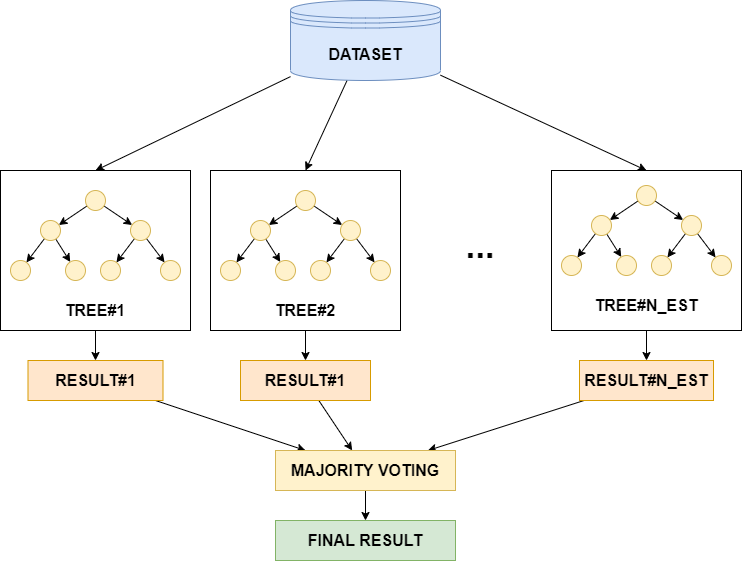

Sumber: Lab 4 KASDD Gasal 2023

### *Random Forest*

*Random Forest* merupakan salah satu variasi dari konsep *bagging* pada *ensemble learning* yang menggunakan Decision Tree sebagai basis modelnya. Setiap model yang dibangun berupa Decision Tree dan nantinya model tersebut dilatih dan digunakan untuk melakukan prediksi. Output dari Random Forest itu sendiri merupakan hasil prediksi yang paling banyak muncul di antara model-model Decision Tree.

In [56]:
# Melakukan training pada model random forest
rf_md = RandomForestRegressor()
rf_md.fit(X_train_admission, Y_train_admission)

# Memprediksi data testing
predicted = rf_md.predict(X_test_admission)

# Menampilkan metrics
regression_metrics(predicted, Y_test_admission)

MAE: 0.043478571428571464
MSE: 0.0032981152857142885
RMSE: 0.05742921979022777
R_squared: 0.7939781634838479


In [57]:
rf_red_paramless = RandomForestClassifier()
rf_red_paramless.fit(X_train_red, Y_train_red)

predicted = rf_red_paramless.predict(X_test_red)

classification_metrics(predicted, Y_test_red)

Accuracy: 0.8544668587896254
F1 Score: 0.845478576223799
Recall Score: 0.8488248679134281
Precision Score: 0.8444223547653493


Terlihat bahwa terdapat perubahan pada metriknya.

Diharapkan untuk mempelajari kelebihan dan kekurangan dari setiap jenis model yang dipelajari agar kita bisa mengetahui pada dataset seperti apa suatu jenis model cocok untuk digunakan. Agar model yang dihasilkan lebih baik, kita juga harus bisa memilih *hyperparameter* yang sesuai dengan permasalahan yang ingin diselesaikan.

Adapun beberapa *hyperparameter* yang dapat kita eksplorasi pada Random Forest:
* `n_estimators`: Berapa banyak decision tree yang akan membentuk random forest
* `max_depth`: Kedalaman maksimal dari masing-masing Decision Tree
* `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node pada setiap Decision Tree

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [dokumentasi Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

## Hyperparameter Tuning

Hyperparameter tuning dapat digunakan untuk mendapatkan hasil evaluasi yang terbaik untuk suatu model. Misalkan kita ingin mendapatkan parameter terbaik untuk model Decision Tree, maka kita harus mencoba berbagai kombinasi hyperparameter yang diinginkan. Untuk mempermudah mencari hyperparameter yang tepat, kita dapat menggunakan modul GridSearchCV dari library Scikit-Learn. Informasi lebih lanjut mengenai GridSearchCV dapat diakses [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Beberapa parameter yang sering digunakan, yaitu:
- `estimator`: model yang akan digunakan
- `param_grid`: kombinasi berbagai hyperparameter yang akan digunakan.
- `cv`: jumlah cross-validation yang ingin digunakan

In [60]:
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, None]}

dt = DecisionTreeRegressor()
clf = GridSearchCV(estimator= dt,
                   param_grid=param_grid, cv= 5)

clf.fit(X_train_admission, Y_train_admission)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [61]:
clf.best_params_

{'criterion': 'absolute_error', 'max_depth': 10, 'min_samples_split': 50}

In [62]:
best_hp = DecisionTreeRegressor(**clf.best_params_)
best_hp.fit(X_train_admission, Y_train_admission)
predicted = best_hp.predict(X_test_admission)
regression_metrics(predicted, Y_test_admission)

MAE: 0.05342857142857143
MSE: 0.005398571428571428
RMSE: 0.07347497144314809
R_squared: 0.6627699446724971


Sekarang kita mendapatkan kombinasi terbaik dari berbagai kombinasi hyperparameter yang telah kita coba.

## BONUS ROUND: Kaggle Competition!

Dalam rangka menerapkan pemahaman kalian pada materi CART dan sebagai sarana untuk **mendapatkan nilai tambahan**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 4 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Regression Case](https://www.kaggle.com/competitions/lab-4-regression-case?rvi=1)
*   [Kaggle Competition Classification Case](https://www.kaggle.com/competitions/lab-4-klasifikasi-kualitas-wine)

**Nilai Bonus**

Penentuan peserta yang mendapatkan nilai bonus akan ditentukan sesuai dengan peringkat dari masing-masing peserta di leaderboard, semakin tinggi peringkat kalian, semakin besar nilai bonus yang akan kalian dapatkan.


# Latihan Soal

## SOAL 2 [10]

### SOAL 2a
[2.5] Bangun dan latih 2 model decision tree (decision tree regressor untuk admission dan decision tree classifier untuk red wine) dengan memberikan nilai pada *hyperparameter*:
- `max_depth = 4`
- `random_state = 2023`.

In [63]:
dtc_red_2 = DecisionTreeClassifier(max_depth=4, random_state=2023)
dtc_red_2.fit(X_train_red, Y_train_red)

DecisionTreeClassifier(max_depth=4, random_state=2023)

In [65]:
classification_metrics(dtc_red_2.predict(X_test_red), Y_test_red)
dtr_adm_2 = DecisionTreeRegressor(max_depth=4, random_state=2023)
dtr_adm_2.fit(X_train_admission, Y_train_admission)
regression_metrics(dtr_adm_2.predict(X_test_admission), Y_test_admission)

Accuracy: 0.5043227665706052
F1 Score: 0.49890891932476866
Recall Score: 0.5079135448132686
Precision Score: 0.534874684750168
MAE: 0.05423554072938112
MSE: 0.004651897304452626
RMSE: 0.06820481877736079
R_squared: 0.7094120905660506


### SOAL 2b
[2.5]  Visualisasikan 2 model decision tree (decision tree regressor untuk admission dan decision tree classifier untuk red wine) yang didapat pada soal 1a!

In [66]:
print(tree.export_text(dtc_red_2))

|--- feature_9 <= 0.64
|   |--- feature_1 <= 0.75
|   |   |--- feature_10 <= 9.00
|   |   |   |--- class: 3
|   |   |--- feature_10 >  9.00
|   |   |   |--- feature_10 <= 10.30
|   |   |   |   |--- class: 5
|   |   |   |--- feature_10 >  10.30
|   |   |   |   |--- class: 6
|   |--- feature_1 >  0.75
|   |   |--- feature_4 <= 0.09
|   |   |   |--- feature_7 <= 1.00
|   |   |   |   |--- class: 4
|   |   |   |--- feature_7 >  1.00
|   |   |   |   |--- class: 3
|   |   |--- feature_4 >  0.09
|   |   |   |--- feature_10 <= 10.99
|   |   |   |   |--- class: 3
|   |   |   |--- feature_10 >  10.99
|   |   |   |   |--- class: 4
|--- feature_9 >  0.64
|   |--- feature_10 <= 10.90
|   |   |--- feature_10 <= 9.90
|   |   |   |--- feature_10 <= 9.82
|   |   |   |   |--- class: 5
|   |   |   |--- feature_10 >  9.82
|   |   |   |   |--- class: 3
|   |   |--- feature_10 >  9.90
|   |   |   |--- feature_5 <= 6.14
|   |   |   |   |--- class: 8
|   |   |   |--- feature_5 >  6.14
|   |   |   |   |--- clas

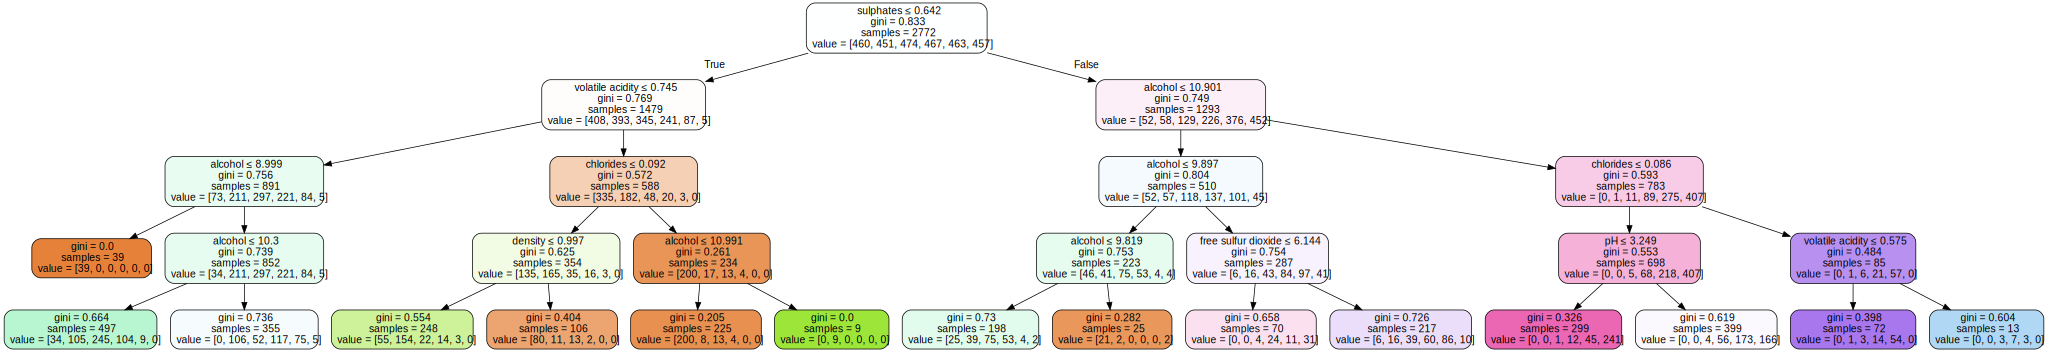

In [69]:
dot_data = tree.export_graphviz(dtc_red_2, out_file=None,
                                feature_names=pd.Series(X_train_red
                                                        .columns).array,
                                filled=True, rounded=True,
                                special_characters=True)

# Membuat dan menampilkan visualisasi
graph = graphviz.Source(dot_data)
graph.render(filename="decision_tree_visualization 2", format="pdf")
graph

In [70]:
print(tree.export_text(dtr_adm_2))

|--- feature_7 <= 8.93
|   |--- feature_7 <= 8.03
|   |   |--- feature_2 <= 305.50
|   |   |   |--- feature_7 <= 7.66
|   |   |   |   |--- value: [0.46]
|   |   |   |--- feature_7 >  7.66
|   |   |   |   |--- value: [0.55]
|   |   |--- feature_2 >  305.50
|   |   |   |--- feature_2 <= 319.50
|   |   |   |   |--- value: [0.60]
|   |   |   |--- feature_2 >  319.50
|   |   |   |   |--- value: [0.74]
|   |--- feature_7 >  8.03
|   |   |--- feature_7 <= 8.34
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- value: [0.63]
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- value: [0.69]
|   |   |--- feature_7 >  8.34
|   |   |   |--- feature_0 <= 126.00
|   |   |   |   |--- value: [0.68]
|   |   |   |--- feature_0 >  126.00
|   |   |   |   |--- value: [0.74]
|--- feature_7 >  8.93
|   |--- feature_7 <= 9.18
|   |   |--- feature_7 <= 9.05
|   |   |   |--- feature_2 <= 311.00
|   |   |   |   |--- value: [0.66]
|   |   |   |--- feature_2 >  311.00
|   |   |   |   |--- value: [0.80]
| 

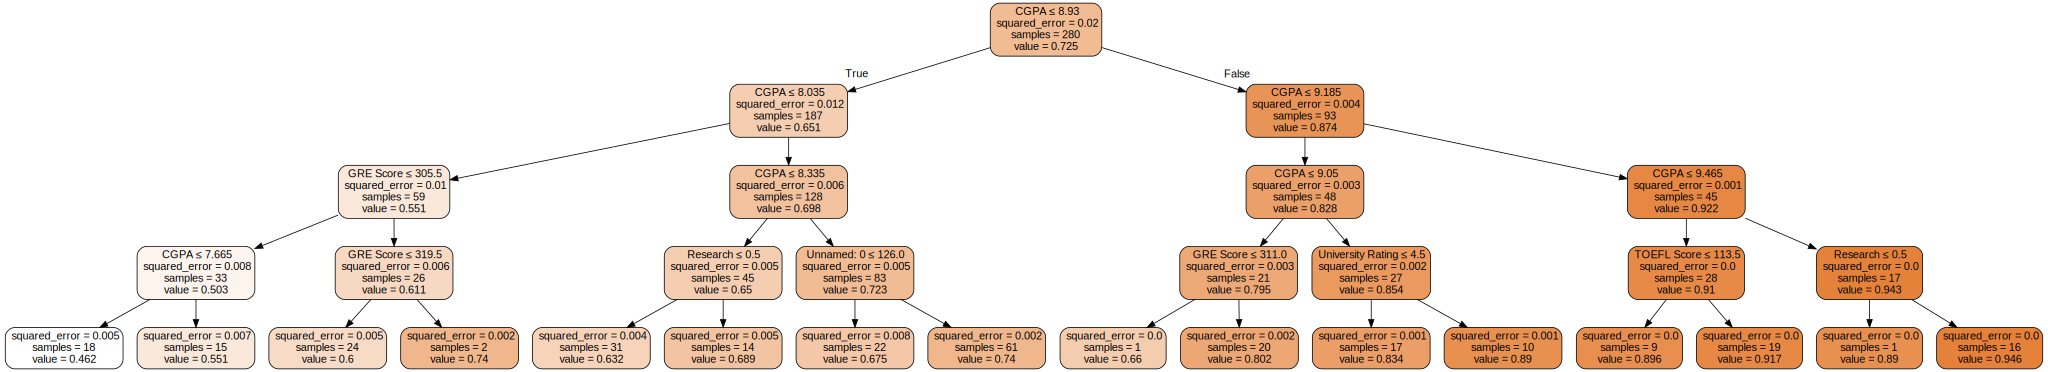

In [72]:
dot_data = tree.export_graphviz(dtr_adm_2, out_file=None,
                                feature_names=pd.Series(X_train_admission.columns).array,
                                filled=True, rounded=True,
                                special_characters=True)

# Membuat visualisasi
graph = graphviz.Source(dot_data)

# Menyimpan visualisasi ke file PDF
graph.render(filename="dtr_adm_2_visualization", format="pdf")
graph

### SOAL 2c

[2.5]  Jika model decision tree regressor diberikan data aktual Chance of Admit 0.96, tentukan attribut-attribut yang menghasilkan hasil prediksi terdekat dengan data aktual tersebut. Berikan juga Mean Absolute Error dari hasil prediksi dengan data aktual `Chance of Admit` dari data X?    

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

Jalur dengan prediksi paling mendekati 0.96:
CGPA > 8.929999828338623
CGPA > 9.184999942779541
CGPA > 9.46500015258789
Research > 0.5
----------------------------------------
Prediksi pada jalur ini: 0.9462499999999997
----------------------------------------
Mean Absolute Error: 0.0413


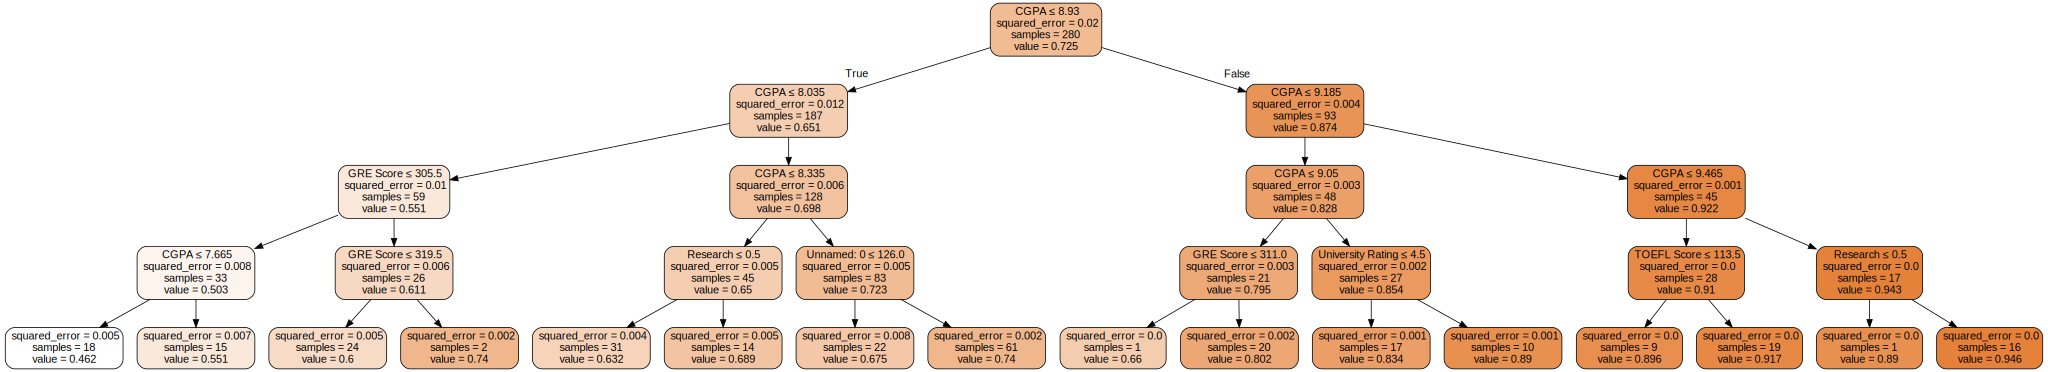

In [107]:
from sklearn.tree import _tree, export_graphviz

dot_data = export_graphviz(dtr_adm_2, out_file=None,
                           feature_names=pd.Series(X_train_admission.columns).array,
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render(filename="regression_tree_visualization", format="pdf")

def extract_paths(tree, feature_names):
    tree_ = tree.tree_
    paths = []

    def recurse(node, path, paths):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_names[tree_.feature[node]]
            threshold = tree_.threshold[node]
            recurse(tree_.children_left[node], path + [(name, '<=', threshold)], paths)
            recurse(tree_.children_right[node], path + [(name, '>', threshold)], paths)
        else:
            paths.append((path, tree_.value[node]))

    recurse(0, [], paths)
    return paths

paths = extract_paths(dtr_adm_2, pd.Series(X_train_admission.columns).array)

nearest_prediction_path = min(paths, key=lambda x: abs(x[1] - 0.96))

print("Jalur dengan prediksi paling mendekati 0.96:")
for feature, comparison, value in nearest_prediction_path[0]:
    print(f"{feature} {comparison} {value}")
print("-" * 40)
print(f"Prediksi pada jalur ini: {nearest_prediction_path[1][0][0]}")
print("-" * 40)
y_pred = dtr_adm_2.predict(X_train_admission)

# Menghitung MAE
mae = mean_absolute_error(Y_train_admission, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
graph


### SOAL 2d

[2.5]  Untuk decision tree classifier, tentukan atribut-atribut dari suatu red wine yang paling berpotensi untuk dikategorikan sebagai kelas 4. Jika terdapat berbagai kemungkinan pasangan atribut yang paling berpotensi, cantumkanlah semua kemungkinan pasangan atribut tersebut.

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

Kondisi untuk klasifikasi sebagai kelas 4 (jalur 1):
sulphates <= 0.6416678726673126
volatile acidity > 0.7452250719070435
chlorides <= 0.09206699952483177
density <= 0.9972914457321167
----------------------------------------
Kondisi untuk klasifikasi sebagai kelas 4 (jalur 2):
sulphates <= 0.6416678726673126
volatile acidity > 0.7452250719070435
chlorides > 0.09206699952483177
alcohol > 10.990881443023682
----------------------------------------


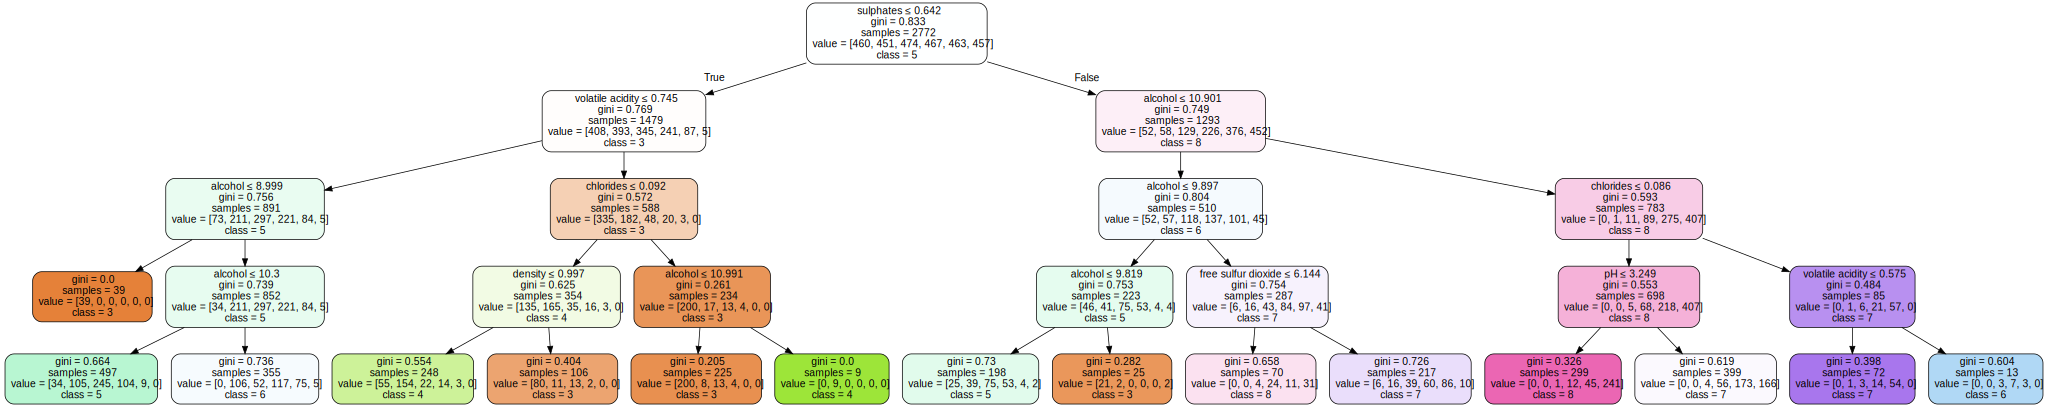

In [108]:
from sklearn.tree import _tree, export_graphviz


dot_data = export_graphviz(dtc_red_2, out_file=None,
                           feature_names=pd.Series(X_train_red.columns).array,
                           class_names=[str(i) for i in dtc_red_2.classes_],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render(filename="decision_tree_visualization_3", format="pdf")

def extract_paths(tree, feature_names):
    tree_ = tree.tree_
    paths = []

    def recurse(node, path, paths):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_names[tree_.feature[node]]
            threshold = tree_.threshold[node]
            recurse(tree_.children_left[node], path + [(name, '<=', threshold)], paths)
            recurse(tree_.children_right[node], path + [(name, '>', threshold)], paths)
        else:
            paths.append((path, tree_.value[node]))

    recurse(0, [], paths)
    return paths

paths = extract_paths(dtc_red_2, pd.Series(X_train_red.columns).array)

class_index = list(dtc_red_2.classes_).index(4)
class_4_paths = [path for path, value in paths if np.argmax(value) == class_index]

for i, conditions in enumerate(class_4_paths, 1):
    print(f"Kondisi untuk klasifikasi sebagai kelas 4 (jalur {i}):")
    for feature, comparison, value in conditions:
        print(f"{feature} {comparison} {value}")
    print("-" * 40)
graph

## SOAL 3 [15]

### SOAL 3a

[5] Implementasikan 2 model Random Forest (Random Forest Regressor untuk Admission Prediction dan Random Forest Classifier untuk Red Wine) Implementasi pada soal ini akan menggunakan nilai *hyperparameter*
- `max_depth = 3`
- `random_state = 2023`

In [73]:
rf_red = RandomForestClassifier(max_depth=3, random_state=2023)
rf_red.fit(X_train_red, Y_train_red)

RandomForestClassifier(max_depth=3, random_state=2023)

In [74]:
rf_adm = RandomForestRegressor(max_depth=3, random_state=2023)
rf_adm.fit(X_train_admission, Y_train_admission)

regression_metrics(rf_adm.predict(X_test_admission), Y_test_admission)

MAE: 0.04782681790213267
MSE: 0.003893526691951049
RMSE: 0.062398130516475005
R_squared: 0.7567848755697186


### SOAL 3b

[5] Model Random Forest dianggap kurang dapat diinterpretasikan dibandingkan dengan Decision Tree. Apakah penyebab dari hasil tersebut?

* **Model Random Forest** dibangun menggunakan beberapa decision tree secara independen. Setiap decision tree dalam Random Forest dibangun menggunakan subset data latih yang berbeda, sehingga setiap decision tree memiliki struktur dan prediksi yang berbeda. Hal ini membuat sulit untuk memahami bagaimana model Random Forest membuat keputusan.

* **Model Random Forest** juga menggunakan voting untuk membuat prediksi. Pada saat melakukan prediksi, Random Forest akan menggunakan voting untuk menentukan kelas atau nilai yang paling mungkin. Hal ini membuat sulit untuk memahami bagaimana setiap decision tree berkontribusi terhadap prediksi final.

### SOAL 3c

[5] Mekanisme voting dalam Random Forest Classifier adalah cara di mana model ini membuat prediksi akhir berdasarkan hasil dari beberapa Decision Tree yang membentuk ensemble-nya. Apakah yang membedakan mekanisme ini dengan mekanisme pengambil keputusan pada Decision Tree Classifier?


* Mekanisme pengambil keputusan pada **Decision Tree Classifier** adalah dengan mengikuti cabang-cabang pohon keputusan hingga mencapai daun, yang mewakili prediksi kelas. Pada setiap node, pohon keputusan akan memilih fitur dan nilai yang paling baik untuk membagi data menjadi dua set data yang lebih kecil. Proses ini dilakukan secara berulang hingga mencapai daun (nilai kategori).

* Mekanisme voting dalam **Random Forest Classifier** adalah dengan menghitung jumlah suara yang diberikan oleh setiap Decision Tree untuk setiap kelas. Kelas dengan jumlah suara terbanyak akan menjadi prediksi akhir. Jadi, hal yang membedakan adalah dari jumlah Decision Tree dan cara pengambilan keputusan akhirnya

## SOAL 4 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan regresi (Dataset Admission Prediction) (`X_test`) menggunakan model yang sudah dibangun pada soal 1 dan 2.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai MAE, MSE, RMSE, dan $R^{2}$ dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi dari kedua model yang sudah didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [76]:
adm_pred2 = dtr_adm_2.predict(X_test_admission)

regression_metrics(adm_pred2, Y_test_admission)

MAE: 0.05423554072938112
MSE: 0.004651897304452626
RMSE: 0.06820481877736079
R_squared: 0.7094120905660506


In [77]:
adm_pred2 = rf_adm.predict(X_test_admission)

regression_metrics(adm_pred2, Y_test_admission)

MAE: 0.04782681790213267
MSE: 0.003893526691951049
RMSE: 0.062398130516475005
R_squared: 0.7567848755697186


## SOAL 5 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan klasifikasi (Dataset Red Wine Prediction) (`X_test`) menggunakan model yang sudah dibangun pada soal 1 dan 2.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai Accuracy, Precision, Recall, dan F1-Score dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [78]:
red_pred1 = dtc_red_2.predict(X_test_red)

classification_metrics(red_pred1, Y_test_red)

Accuracy: 0.5043227665706052
F1 Score: 0.49890891932476866
Recall Score: 0.5079135448132686
Precision Score: 0.534874684750168


In [79]:
red_pred2 = rf_red.predict(X_test_red)

classification_metrics(red_pred2, Y_test_red)

Accuracy: 0.5720461095100865
F1 Score: 0.53014422588943
Recall Score: 0.5741072665999163
Precision Score: 0.5785118680574375


## SOAL 6 [15]

Gunakan GridSearchCV untuk mencari hyperparameter yang baik untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier.

### SOAL 6a
[9]
Proses Grid search diwajibkan melakukan tuning pada hyperparameter berikut: **criterion, max_depth, min_samples_split**.
*Namun, kalian masih boleh mengambil hyperparameter lain.*

In [82]:
# Random Forest Regressor

param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, None]}

dtr = DecisionTreeRegressor()
clf_dtr = GridSearchCV(estimator= dtr,
                   param_grid=param_grid, cv= 5)

clf_dtr.fit(X_train_admission, Y_train_admission)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [83]:
# Random Forest Classifier

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, None]}

dtc = DecisionTreeClassifier()
clf_dtc = GridSearchCV(estimator= dtc,
                   param_grid=param_grid, cv= 5)

clf_dtc.fit(X_train_red, Y_train_red)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [85]:
# Random Forest Regressor

param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [2, 5, 10],
               'max_depth' : [5, 10, 12, None]}

rfr = RandomForestRegressor()
clf_rfr = GridSearchCV(estimator= rfr,
                   param_grid=param_grid, cv= 5)

clf_rfr.fit(X_train_admission, Y_train_admission)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [2, 5, 10]})

In [86]:
# Random Forest Classifier

param_grid = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [2, 5, 10],
               'max_depth' : [5, 10, 12, None]}

rfc = RandomForestClassifier()
clf_rfc = GridSearchCV(estimator= rfc,
                   param_grid=param_grid, cv= 5)

clf_rfc.fit(X_train_red, Y_train_red)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [2, 5, 10]})

### SOAL 6b
[1]

Tampilkan hyperparameter terbaik yang kalian dapatkan dari proses Grid Search untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier dari nomor 5a.

In [88]:
clf_dtr.best_params_

{'criterion': 'squared_error', 'max_depth': 12, 'min_samples_split': 20}

In [89]:
clf_dtc.best_params_

{'criterion': 'log_loss', 'max_depth': None, 'min_samples_split': 10}

In [90]:
clf_rfr.best_params_

{'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 10}

In [91]:
clf_rfc.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}

### SOAL 6c
[2.5]

Buatlah 2 model Random Forest (Random Forest Classifier dan Random Forest Regressor) dan 2 model Decision Tree (Decision Tree Classifier dan Decision Tree Regressor) berdasarkan hyperparameter yang kalian dapatkan dari **soal 5a**

In [94]:
# Random Forest Regressor

optimized_rf_regressor = RandomForestRegressor(**clf_rfr.best_params_)

optimized_rf_regressor.fit(X_train_admission, Y_train_admission)

RandomForestRegressor(min_samples_split=10)

In [97]:
# Random Forest Classifier

optimized_rf_classifier = RandomForestClassifier(**clf_rfc.best_params_)

optimized_rf_classifier.fit(X_train_red, Y_train_red)

RandomForestClassifier()

In [98]:
# Random Tree Regressor

optimized_dt_regressor = DecisionTreeRegressor(**clf_dtr.best_params_)

optimized_dt_regressor.fit(X_train_admission, Y_train_admission)

DecisionTreeRegressor(max_depth=12, min_samples_split=20)

In [99]:
# Random Tree Classifier

optimized_dt_classifier = DecisionTreeClassifier(**clf_dtc.best_params_)

optimized_dt_classifier.fit(X_train_red, Y_train_red)

DecisionTreeClassifier(criterion='log_loss', min_samples_split=10)

### SOAL 6d
[2.5]

Lakukan 4 buah prediksi (karena terdapat 4 model) dengan X_test dari masing-masing dataset dan **munculkan** hasil evaluasi terhadap label y_test dari masing-masing dataset.

**Note**: Terdapat 2 function metrics, yakni `regression_metrics` dan `classification_metrics`.


In [100]:
# Random Forest Regressor

rfr_pred = optimized_rf_regressor.predict(X_test_admission)

regression_metrics(rfr_pred, Y_test_admission)

MAE: 0.04446211510833015
MSE: 0.0033638956800332446
RMSE: 0.057999100682969595
R_squared: 0.7898690901282107


In [101]:
# Random Forest Classifier

rfc_pred = optimized_rf_classifier.predict(X_test_red)

classification_metrics(rfc_pred, Y_test_red)

Accuracy: 0.8530259365994236
F1 Score: 0.8438073833034417
Recall Score: 0.8473811079432961
Precision Score: 0.8432134338750096


In [102]:
# Random Tree Regressor

dtr_pred = optimized_dt_regressor.predict(X_test_admission)

regression_metrics(dtr_pred, Y_test_admission)

MAE: 0.05681643544180033
MSE: 0.0054691650026612
RMSE: 0.07395380316563308
R_squared: 0.6583602086504694


In [103]:
# Random Tree Classifier

dtc_pred = optimized_dt_classifier.predict(X_test_red)

classification_metrics(dtc_pred, Y_test_red)


Accuracy: 0.7435158501440923
F1 Score: 0.7407017995460329
Recall Score: 0.7388955179660365
Precision Score: 0.7442977151568625


## SOAL 7 [5]
1. [2] Jelaskan konsep bootstrapping dalam konteks Random Forests. Bagaimana hal ini berkontribusi pada keragaman dari berbagai decision trees yang terbentuk?
2. [1] Bagaimana prediksi dari seluruh Decision Tree Regressor digabungkan dalam Random Forest Regressor?
3. [2] Jelaskanlah bagaimana Random Forest dapat digunakan untuk masalah klasifikasi multi-kelas, seperti pada kasus prediksi kelas Red Wine pada Lab 4 ini.

**1. Bootstrap Random Forest**

Bootstrapping adalah metode untuk menghasilkan sampel data baru dari sampel data asli. Dalam konteks Random Forests, bootstrapping digunakan untuk menghasilkan sejumlah sampel data baru dari sampel data asli. Setiap sampel data baru ini disebut sebagai bootstrap sample.

Dalam Random Forests, bootstrapping digunakan untuk melatih sejumlah decision trees. Setiap decision tree dilatih pada bootstrap sample yang berbeda. Hal ini dilakukan untuk meningkatkan keragaman dari berbagai decision trees yang terbentuk.

Keragaman dari berbagai decision trees yang terbentuk berkontribusi pada peningkatan akurasi dan robustness dari Random Forests. Hal ini dikarenakan setiap decision tree akan memiliki kekuatan dan kelemahannya masing-masing. Dengan memiliki sejumlah decision trees yang berbeda, Random Forests dapat mengurangi efek dari kesalahan yang terjadi pada satu decision tree.

Berikut adalah penjelasan lebih lanjut tentang bagaimana bootstrapping berkontribusi pada keragaman dari berbagai decision trees yang terbentuk:

**Random sampling**
Saat bootstrapping dilakukan, data disampling secara acak dari sampel data asli. Hal ini menyebabkan setiap bootstrap sample memiliki data yang berbeda dengan bootstrap sample lainnya.

**Replacement**
Data dapat disampling secara acak dengan atau tanpa replacement. Jika dilakukan dengan replacement, data dapat muncul lebih dari satu kali dalam bootstrap sample yang sama. Hal ini juga berkontribusi pada keragaman dari bootstrap sample.

**Random feature sampling**
Dalam Random Forests, setiap decision tree dilatih pada subset dari fitur-fitur yang ada. Fitur-fitur dipilih secara acak dari seluruh fitur yang ada. Hal ini juga berkontribusi pada keragaman dari berbagai decision trees yang terbentuk.

Secara umum, bootstrapping adalah teknik yang penting dalam Random Forests. Teknik ini berkontribusi pada peningkatan akurasi dan robustness dari Random Forests dengan meningkatkan keragaman dari berbagai decision trees yang terbentuk..

**2. Penggabungan Prediksi**

Dalam Random Forest Regressor, prediksi dari seluruh decision trees digabungkan dengan menggunakan rata-rata. Hal ini dilakukan untuk menghasilkan prediksi yang lebih akurat dan stabil.

Misalnya, jika ada 100 decision trees dalam ensemble, maka prediksi final untuk sebuah titik data adalah rata-rata dari prediksi 100 decision trees tersebut.

Secara sederhana, prediksi dari setiap decision tree merupakan prediksi nilai target untuk sebuah titik data. Prediksi final dari Random Forest Regressor adalah rata-rata dari prediksi dari seluruh decision trees.

Proses ini dilakukan untuk mengurangi varians dari prediksi, sehingga menghasilkan prediksi yang lebih akurat dan stabil.

**3. Random Forest dalam klasifikasi Multi-Kelas**

Dalam konteks klasifikasi multi-kelas, seperti prediksi kelas Red Wine, setiap pohon dalam Random Forest akan memberikan sebuah "vote" untuk setiap kelas yang mungkin. Kelas dengan vote terbanyak dari semua pohon dalam hutan dianggap sebagai prediksi akhir.

Sebagai contoh, anggap kita memiliki masalah klasifikasi dengan 3 kelas: A, B, dan C. Jika kita memiliki Random Forest dengan 100 pohon, dan untuk suatu contoh, 50 pohon memprediksi kelas A, 30 memprediksi kelas B, dan 20 memprediksi kelas C, maka prediksi akhir untuk contoh tersebut akan menjadi kelas A, karena itu adalah kelas dengan vote terbanyak.

Hal ini memungkinkan Random Forest untuk menangani masalah klasifikasi multi-kelas dengan efisien, memanfaatkan "kekuatan dari banyak pohon" untuk memberikan prediksi yang lebih kuat dan akurat.

## SOAL 8 [5]

1. [2.5] Random Forest memasukkan unsur *randomness* melalui bootstrapping dan *feature selection*. Bagaimanakah hal ini dapat memengaruhi reproduksibilitas hasil, dan apa yang dapat dilakukan untuk memastikan *output* yang konsisten?
2. [2.5] Apakah *scaling* atau *feature normalization* diperlukan untuk Random Forest? Mengapa atau mengapa tidak?

1. Unsur randomness dalam Random Forest dapat memengaruhi reproduksibilitas hasil dalam:
* Perubahan sampel bootstrap  
Bootstrapping adalah proses pengambilan sampel ulang dengan pengembalian dari data pelatihan. Setiap kali bootstrapping dilakukan, sampel yang dihasilkan mungkin berbeda. Hal ini dapat menyebabkan perbedaan dalam model yang dilatih, dan akhirnya menghasilkan hasil yang berbeda.

* Perubahan pemilihan fitur  
Pada setiap node decision tree, fitur yang digunakan untuk membagi data dipilih secara acak dari daftar semua fitur. Hal ini dapat menyebabkan perbedaan dalam model yang dilatih, dan akhirnya menghasilkan hasil yang berbeda.

2. Scaling atau Feature Normalization untuk Random Forest**

*Scaling* atau *feature normalization* umumnya **tidak diperlukan** untuk Random Forest. Alasan utamanya adalah:

- **Karakteristik**: Random Forest terdiri dari decision tree. decision tree membagi sampel berdasarkan pemisahan pada nilai variabel, bukan pada jarak antar titik data. Oleh karena itu, mereka cenderung tidak peka terhadap perbedaan skala antar fitur.
  
- **Pemisahan Berdasarkan Nilai**: Karena pemisahan pada pohon dilakukan berdasarkan nilai dari suatu fitur dan bukan berdasarkan jarak, *scaling* fitur tidak akan mengubah cara pohon membuat keputusan.